In [1]:
using Plots
include(joinpath(@__DIR__, "../run.jl"))

      From worker 4:	  Activating environment at `~/Hamburg/LadderDGA.jl/Project.toml`
      From worker 2:	  Activating environment at `~/Hamburg/LadderDGA.jl/Project.toml`
      From worker 5:	  Activating environment at `~/Hamburg/LadderDGA.jl/Project.toml`
      From worker 6:	  Activating environment at `~/Hamburg/LadderDGA.jl/Project.toml`
      From worker 8:	  Activating environment at `~/Hamburg/LadderDGA.jl/Project.toml`
      From worker 7:	  Activating environment at `~/Hamburg/LadderDGA.jl/Project.toml`
      From worker 3:	  Activating environment at `~/Hamburg/LadderDGA.jl/Project.toml`


  Activating environment at `~/Hamburg/LadderDGA.jl/Project.toml`
┌ Info: Precompiling LadderDGA [78e40beb-bf89-4c0e-9d2b-bee278912f2b]
└ @ Base loading.jl:1317


In [11]:
conf = "../config.toml"
λ_sp, λ_new_sp, λ_new_ch, bubbleLoc, locQ_sp, locQ_ch, bubble, nlQ_ch, nlQ_sp, Σ_ladder, Σ_ladderLoc = run_sim(cfg_file=conf);

┌ Warning: assuming linear, continuous nu grid for chi/trilex
└ @ Main /home/julian/Hamburg/LadderDGA.jl/run.jl:12
┌ Info: Reading Inputs...
└ @ LadderDGA /home/julian/Hamburg/LadderDGA.jl/src/helpers.jl:55
┌ Info: loading from 
│   env.inputVars = ED_out.jld2
└ @ LadderDGA /home/julian/Hamburg/LadderDGA.jl/src/helpers.jl:81
┌ Warning: TODO: check beta consistency, config <-> g0man, chi_dir <-> gamma dir
└ @ LadderDGA /home/julian/Hamburg/LadderDGA.jl/src/helpers.jl:110
┌ Info: Constructing fit kernels
└ @ LadderDGA /home/julian/Hamburg/LadderDGA.jl/src/helpers.jl:131


8:34
SeriesAcceleration.Richardson(10:14, [100.04166666666667; -682.6666666666666; 1640.25; -1666.6666666666667; 610.0416666666666])


┌ Info: Inputs Read. Starting Computation.
│ Found usable intervals for local susceptibility of length 
│   sp: 27
│   ch: 27 
│   χLoc_sp = 0.2836, χLoc_ch = 0.0207
└ @ LadderDGA /home/julian/Hamburg/LadderDGA.jl/src/helpers.jl:157
┌ Info: Calculating local quantities: 
└ @ Main /home/julian/Hamburg/LadderDGA.jl/run.jl:19
┌ Info: Calculating bubble: 
└ @ Main /home/julian/Hamburg/LadderDGA.jl/run.jl:29
┌ Info: Calculating χ and γ: 
└ @ Main /home/julian/Hamburg/LadderDGA.jl/run.jl:32
┌ Info: Calculating λ correction: 
└ @ Main /home/julian/Hamburg/LadderDGA.jl/run.jl:37
┌ Info: Computing λsp corrected χsp, using 
│   sP.χFillType = lambda_χ_fill
│    as fill value outside usable ω range. =  as fill value outside usable ω range.
└ @ LadderDGA /home/julian/Hamburg/LadderDGA.jl/src/lambdaCorrection.jl:169
┌ Warning: currently using min(usable_sp, usable_ch) for all calculations. relax this?
└ @ LadderDGA /home/julian/Hamburg/LadderDGA.jl/src/lambdaCorrection.jl:13
┌ Info: Found usable in

-----------------------------------------------


┌ Info: Found λsp 
│   λsp = 0.10856808492985942
└ @ LadderDGA /home/julian/Hamburg/LadderDGA.jl/src/lambdaCorrection.jl:48


-----------------------------------------------
-----------------------------------------------
-----------------------------------------------


┌ Info: new lambda correction: λsp=0.13685957951890568 and λch=-1.2118716543479842
└ @ LadderDGA /home/julian/Hamburg/LadderDGA.jl/src/lambdaCorrection.jl:188
┌ Info: Calculating Σ ladder: 
└ @ Main /home/julian/Hamburg/LadderDGA.jl/run.jl:40
┌ Info: Done.
└ @ Main /home/julian/Hamburg/LadderDGA.jl/run.jl:45


┌ Info: Reading Inputs...
└ @ LadderDGA /home/julian/Hamburg/LadderDGA.jl/src/helpers.jl:55
┌ Info: loading from 
│   env.inputVars = ED_out.jld2
└ @ LadderDGA /home/julian/Hamburg/LadderDGA.jl/src/helpers.jl:81


8:34
SeriesAcceleration.Richardson(10:14, [100.04166666666667; -682.6666666666666; 1640.25; -1666.6666666666667; 610.0416666666666])


┌ Warning: TODO: check beta consistency, config <-> g0man, chi_dir <-> gamma dir
└ @ LadderDGA /home/julian/Hamburg/LadderDGA.jl/src/helpers.jl:110
┌ Info: Constructing fit kernels
└ @ LadderDGA /home/julian/Hamburg/LadderDGA.jl/src/helpers.jl:131
┌ Info: Inputs Read. Starting Computation.
│ Found usable intervals for local susceptibility of length 
│   sp: 27
│   ch: 27 
│   χLoc_sp = 0.2836, χLoc_ch = 0.0207
└ @ LadderDGA /home/julian/Hamburg/LadderDGA.jl/src/helpers.jl:157


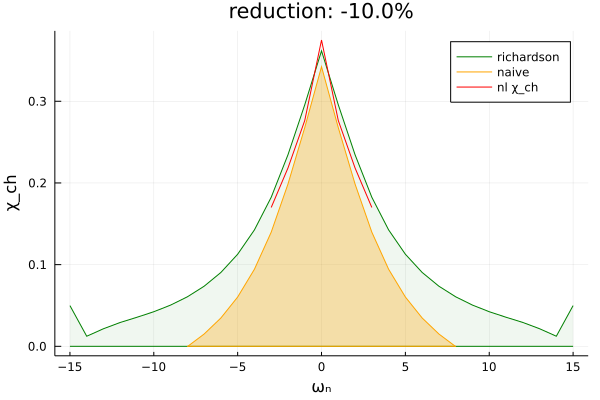

In [50]:
# naive:
mP, sP, env, kGrid, qGrid, νGrid, sumHelper_f, impQ_sp, impQ_ch, GImp_fft, GLoc_fft, Σ_loc_pos, FUpDo, gImp = setup_LDGA(conf, false);
χchED_ω_naive = sum(impQ_ch.χ,dims=[2,3])[:,1,1]/(mP.β^2);
χspED_ω_naive = sum(impQ_sp.χ,dims=[2,3])[:,1,1]/(mP.β^2);
χch_ω = sum_q(nlQ_ch.χ, qGrid.multiplicity, dims=2)[:,1]
χsp_ω = sum_q(nlQ_sp.χ, qGrid.multiplicity, dims=2)[:,1]


reduction_prct = -0.1
χchED_ω_fit = [LadderDGA.sum_freq(impQ_ch.χ[i,:,:], [1,2], sumHelper_f, mP.β)[1,1] for i in 1:size(impQ_ch.χ,1)];
χspED_ω_fit = [LadderDGA.sum_freq(impQ_sp.χ[i,:,:], [1,2], sumHelper_f, mP.β)[1,1] for i in 1:size(impQ_sp.χ,1)];
usable_ch = LadderDGA.find_usable_interval(real(χchED_ω_fit), reduce_range_prct=reduction_prct)
usable_sp = LadderDGA.find_usable_interval(real(χspED_ω_fit), reduce_range_prct=reduction_prct)
usable_fit_DMFT = intersect(usable_ch, usable_sp)

usable_naive_ch = LadderDGA.find_usable_interval(real(χchED_ω_naive), reduce_range_prct=reduction_prct)
usable_naive_sp = LadderDGA.find_usable_interval(real(χspED_ω_naive), reduce_range_prct=reduction_prct)


plot(usable_ch .- sP.n_iω .- 1, real(χchED_ω_fit[usable_ch]), label="richardson", c=:green)
plot!(usable_ch .- sP.n_iω .- 1, repeat([0], length(usable_ch)), fillrange=real(χchED_ω_fit[usable_ch]), fillalpha=0.06, c=:green, label=nothing)

plot!(usable_naive_ch .- sP.n_iω .- 1, real(χchED_ω_naive[usable_naive_ch]), label="naive", xlabel="ωₙ", ylabel="χ_ch", c=:orange, title="reduction: $(reduction_prct*100)%")
plot!(usable_naive_ch .- sP.n_iω .- 1, repeat([0], length(usable_naive_ch)), fillrange=real(χchED_ω_naive[usable_naive_ch]), fillalpha=0.3, c=:orange, label=nothing)

plot!(nlQ_ch.usable_ω .- sP.n_iω .- 1, real(χch_ω[nlQ_ch.usable_ω]), label="nl χ_ch", c=:red)

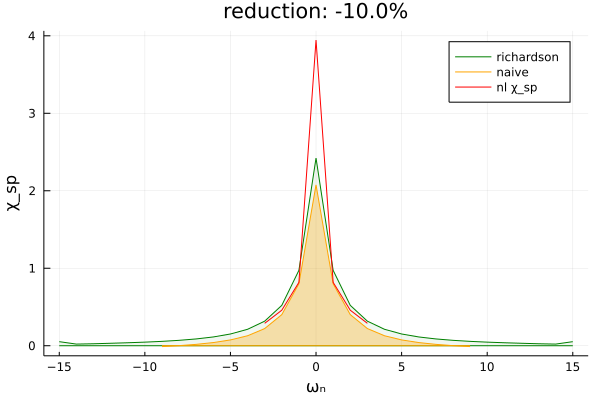

In [51]:
plot(usable_sp .- sP.n_iω .- 1, real(χspED_ω_fit[usable_sp]), label="richardson", c=:green)
plot!(usable_sp .- sP.n_iω .- 1, repeat([0], length(usable_sp)), fillrange=real(χspED_ω_fit[usable_sp]), fillalpha=0.06, c=:green, label=nothing)

plot!(usable_naive_sp .- sP.n_iω .- 1, real(χspED_ω_naive[usable_naive_sp]), label="naive", xlabel="ωₙ", ylabel="χ_sp", c=:orange, title="reduction: $(reduction_prct*100)%")
plot!(usable_naive_sp .- sP.n_iω .- 1, repeat([0], length(usable_naive_sp)), fillrange=real(χspED_ω_naive[usable_naive_sp]), fillalpha=0.3, c=:orange, label=nothing)

plot!(nlQ_sp.usable_ω .- sP.n_iω .- 1, real(χsp_ω[nlQ_sp.usable_ω]), label="nl χ_sp", c=:red)

In [42]:
size(nlQ_sp.χ)

(41, 10)